In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/Practice Datasets/diabetes.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
import seaborn as sns

In [ ]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
diabetes_data['BMI'] = diabetes_data['BMI'].astype(int)
diabetes_data['DiabetesPedigreeFunction'] = diabetes_data['DiabetesPedigreeFunction'].astype(int)

In [ ]:
diabetes_data.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


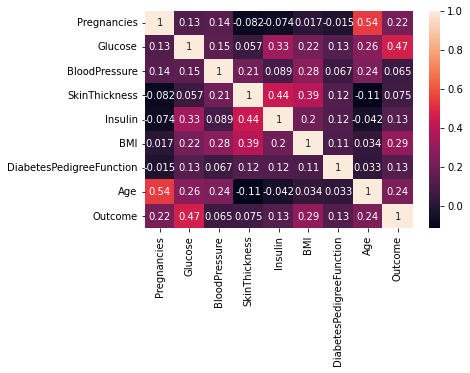

In [ ]:

sns.heatmap(diabetes_data.corr(), annot = True) #Annot specifies Correlation values
plt.show()

In [ ]:
diabetes_data['skth_ins'] = diabetes_data['SkinThickness'] + diabetes_data['Insulin']

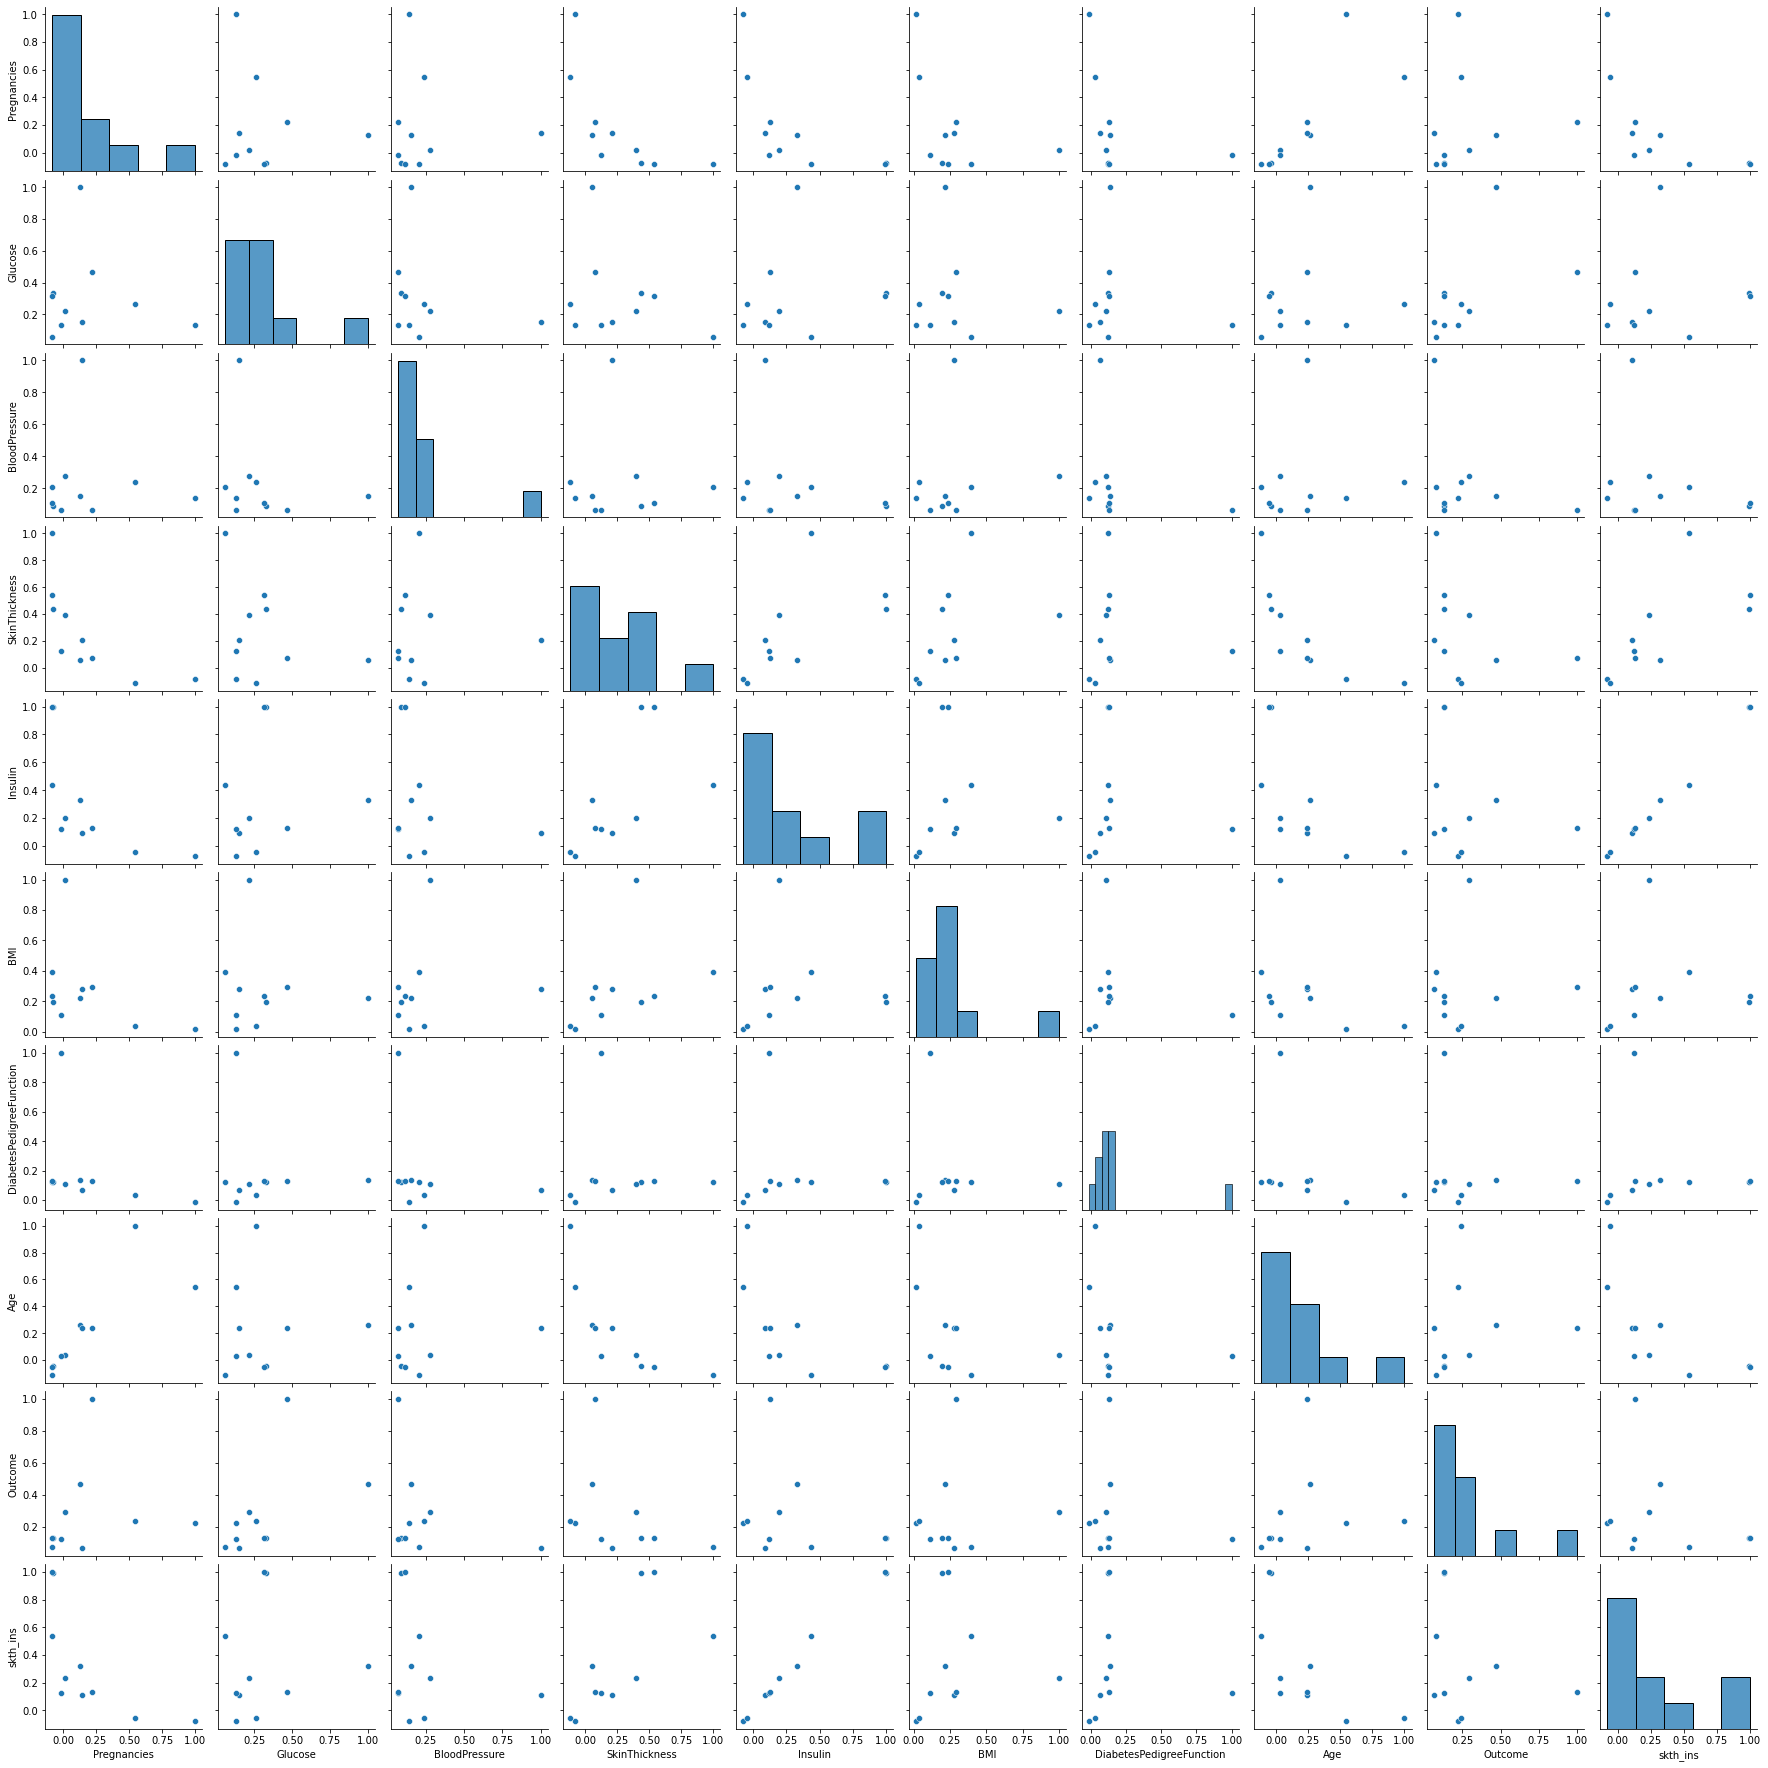

In [ ]:
sns.pairplot(data = diabetes_data.corr())

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,skth_ins
0,6,148,72,35,0,33,0,50,1,35
1,1,85,66,29,0,26,0,31,0,29
2,8,183,64,0,0,23,0,32,1,0
3,1,89,66,23,94,28,0,21,0,117
4,0,137,40,35,168,43,2,33,1,203


In [ ]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'skth_ins'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
train = diabetes_data.drop(['Outcome', 'skth_ins'],axis=1)
test = diabetes_data['Outcome']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=100)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = lr.predict(X_test)


In [ ]:
pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
lr.score(X_train,y_train)

0.7801302931596091

In [ ]:
lr.score(X_test,y_test)

0.7142857142857143

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr = classification_report(y_test,pred )
cr

'              precision    recall  f1-score   support\n\n           0       0.76      0.82      0.79       101\n           1       0.60      0.51      0.55        53\n\n    accuracy                           0.71       154\n   macro avg       0.68      0.67      0.67       154\nweighted avg       0.71      0.71      0.71       154\n'

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x = scaler.fit(diabetes_data)
y = x.transform(diabetes_data)

In [ ]:
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  1.4259954   1.36589591
  -0.53131121]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.19067191 -0.73212021
  -0.58010315]
 [ 1.23388019  1.94372388 -0.26394125 ... -0.10558415  1.36589591
  -0.81593087]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.27575966 -0.73212021
   0.28188782]
 [-0.84488505  0.1597866  -0.47073225 ...  1.17073215  1.36589591
  -0.81593087]
 [-0.84488505 -0.8730192   0.04624525 ... -0.87137393 -0.73212021
  -0.56383917]]
